In [115]:
import requests
import pandas as pd
import datetime as dt
import time
import matplotlib.pyplot as plt


def strunix(s: str) -> str:
    """returns a UTC unixtime ms string from a string formatted 'yyyy/mm/dd'"""
    sep = [int(t) for t in s.split('/')]
    formatted = dt.date(sep[0], sep[1], sep[2])
    norm = time.mktime((1970, 1, 1, 0, 0, 0, 0, 0, 0)) # normalizer for UTC
    return str(int((time.mktime(formatted.timetuple()) - norm) * 1000))

def coincap(base, quote, start, end):
    """friendly version of coincap's RESTful API for incrased legibility"""
    
    url = "http://api.coincap.io/v2/candles"
    params ={
        'exchange': 'poloniex', # this may need to be changed for trading pairs
        'interval': 'd1',
        'baseId': base,
        'quoteId': quote,
        'start': strunix(start),
        'end': strunix(end)
    }

    response = requests.request("GET", url, params = params)

    df = pd.DataFrame(response.json()['data'])
    # Changes unix ms to utc datetime
    df['period'] = [dt.datetime.utcfromtimestamp(int(t)/1000) for t in df['period']]
    df = df.set_index('period')
    
    for c in df.columns:
        df[c] = [float(n) for n in df[c]] # casts strings to floats for OHLCV
    return df

In [123]:
eth_btc = coincap('ethereum', 'bitcoin', '2016/01/01', '2017/01/01')
eth_btc

,open,high,low,close,volume
period,,,,,
2016-05-29,0.022996,0.024100,0.021900,0.023500,6.518333e+05
2016-05-30,0.023500,0.024180,0.022652,0.023831,5.990864e+05
2016-05-31,0.023831,0.027600,0.023371,0.026544,1.612941e+06
2016-06-01,0.026544,0.027302,0.024930,0.026081,7.902543e+05
2016-06-02,0.026081,0.026448,0.025129,0.025529,3.181082e+05
...,...,...,...,...,...
2016-12-27,0.008032,0.008160,0.007522,0.007659,5.536708e+05
2016-12-28,0.007659,0.008089,0.007302,0.007695,1.141741e+06
2016-12-29,0.007695,0.008900,0.007687,0.008513,1.615309e+06


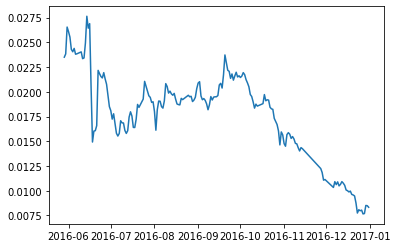

In [146]:
plt.plot(eth_btc.index, eth_btc['close'])
# plt.bar(eth_btc.index, eth_btc['volume'])
plt.show()

# Here we see a 5 year rolling limit to historical data